In [42]:
#Import library yang dibutuhkan
from keras.applications.efficientnet_v2 import EfficientNetV2M
from keras.applications.mobilenet_v2 import MobileNetV2

#Deklarasikan model yang akan dipakai
model = EfficientNetV2M()
#model = MobileNetV2()

#Tampilkan layer-layer model VGG16
model.summary()

Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 480, 480, 3)  0           ['input_2[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 240, 240, 24  648         ['rescaling_1[0][0]']            
                                )                                                                 
                                                                                   

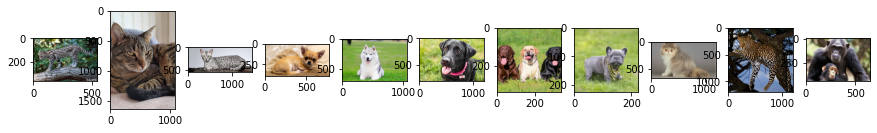

(11, 480, 480, 3)


In [31]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

urls=[]
urls.append("https://wildcatconservation.org/wp-content/uploads/2018/06/L-tigrinus-A-Sliwa.jpg")
urls.append("https://cloudfront-ap-southeast-2.images.arcpublishing.com/nzme/SZ5QGV5WI5KOQ26XSQIMJDPM2I.jpg")
urls.append("https://www.purina.co.uk/sites/default/files/2022-02/GettyImages-1250476831%20%281%29.jpg")
urls.append("https://asset.kompas.com/crops/JzPfRYjgKGAEo9XpP52anuXpCs0=/9x2:747x494/780x390/data/photo/2021/05/06/6093d3fb4bc06.jpg")
urls.append("https://asset-a.grid.id/crop/0x0:0x0/x/photo/2022/05/12/pexels-albina-chamonixdeus-38122-20220512120733.jpg")
urls.append("https://cdn.mos.cms.futurecdn.net/ZvueiLL2vdwoHWHjCRuQCW-1200-80.jpg")
urls.append("https://asset.kompas.com/crops/DSxi4p0VRITf_4Ec8DfgG3TZR0I=/189x0:856x667/340x340/data/photo/2022/05/25/628dbdb8cb831.jpg")
urls.append("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSwjCrNdz8TeMZYhyk6qvZy7kUBmAIoJwNC8Q&usqp=CAU")
urls.append("https://klikterbaru.com/wp-content/uploads/2022/06/Kucing-Persia-Flatnose.jpg")
urls.append("https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/African_leopard_male_%28cropped%29.jpg/1200px-African_leopard_male_%28cropped%29.jpg")
urls.append("https://static.gatra.com/foldershared/images/2022/roh/06-Jun/simpanse3.png")

imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
  r = requests.get(urls[u], stream=True) #Download
  img = np.array(Image.open(r.raw))  #Konversi ke NP Array
  plt.subplot(1,len(urls),u+1) #Menampilkan ke matplotlib
  plt.imshow(img) #Menampilkan ke matplotlib
  img = cv2.resize(img, (480,480)) #Resize sesuai input VGG 16
  imgs.append(img) #Kumpulkan semua image yang telah di preproses ke imgs
plt.show() #Menampilkan ke matplotlib
imgs = np.array(imgs) #Konversi ke Np Array 
print (imgs.shape) #Debuging (Apakah shape-nya benar?)

In [33]:
yh = model.predict(imgs)
for i in range(len(urls)):
  if(np.argmax(yh[i]) >= 151 and np.argmax(yh[i])<=268 ):
      print("Anjing")
  elif(np.argmax(yh[i]) >= 281 and np.argmax(yh[i])<=287 ) :
      print("Kucing")
  else:
      print("Lainya")

1/1 [==============================] - 2s 2s/step
Kucing
Kucing
Kucing
Anjing
Anjing
Anjing
Anjing
Anjing
Kucing
Lainya
Lainya


In [40]:
np.argmax(yh[0])

287

In [5]:
yh.shape

(10, 1000)

In [6]:
yh[0]

array([1.42167541e-04, 2.29573823e-04, 1.03749851e-04, 1.05152780e-04,
       1.76837915e-04, 1.33243753e-04, 1.62518278e-04, 1.85069337e-04,
       1.34524264e-04, 1.51659173e-04, 2.14411441e-04, 1.53767993e-04,
       1.09263514e-04, 1.10937603e-04, 2.07294899e-04, 1.61139789e-04,
       1.53613379e-04, 1.57282891e-04, 1.75790032e-04, 1.35205686e-04,
       1.36641669e-04, 7.87516547e-05, 1.07510881e-04, 1.43744910e-04,
       1.31809400e-04, 1.92008461e-04, 2.68152595e-04, 2.03860312e-04,
       1.50050182e-04, 1.79325056e-04, 2.18635541e-04, 1.86816367e-04,
       2.59348803e-04, 1.42226520e-04, 1.45405895e-04, 2.07500794e-04,
       1.61620279e-04, 1.78944596e-04, 1.09647022e-04, 1.65539168e-04,
       1.47710074e-04, 1.42279561e-04, 1.41882556e-04, 1.76099114e-04,
       1.56448572e-04, 2.83915608e-04, 1.45336729e-04, 1.87308207e-04,
       2.26093092e-04, 1.36830873e-04, 1.89007129e-04, 7.57801026e-05,
       1.62996657e-04, 2.41376154e-04, 2.07463818e-04, 1.24681028e-04,
      